In [1]:
import os.path as op
import os
import mne
from mne.io import concatenate_raws, read_raw_edf
import pandas as pd
import numpy as np

## Dataset
**[EEG dataset of Fusion relaxation and concentration moods](https://data.mendeley.com/datasets/8c26dn6c7w/1) --- 30 subjects**

Fore sessions (EP1, EP2, EP3, EP4) were recorded for each subject. Such that, first two sessions are done on the same day with 1-2 hours interval, and remaining sessions are done after 2-3 days in the same way. Each sessons-> 3 Minutus length.

***Raw data load in a dataframe where each raw represents a subject and columns are EPISOD***

In [39]:
root = "/home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/"
df_raw = pd.DataFrame
raws = []
for path, dirs, files in os.walk(root):
#     print(path)
    temp = []
    for file in files:
        fname = path + "/" + file
        eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
        temp.append(eeg_raw)
    raws.append(temp)
# print(raws)
df_raw = pd.DataFrame(raws,
               columns =['EP1', 'EP2', 'EP3', 'EP4'])
df_raw = df_raw.dropna() # Contain the raw data of 30 subjects

Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S008/S008E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S008/S008E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S008/S008E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S008/S008E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis

/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.p

Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S015/S015E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S015/S015E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S015/S015E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S015/S015E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =   

/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.p

Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S028/S028E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S028/S028E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S028/S028E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S028/S028E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis

/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.p

Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S021/S021E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S022/S022E03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S022/S022E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S022/S022E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis

/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.p

Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S027/S027E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S027/S027E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S017/S017E02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S017/S017E04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =   

/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)
/tmp/ipykernel_3679/1601326913.py:9: RuntimeWarning: Physical range is not defined in following channels:
P8
  eeg_raw = read_raw_edf(fname, eog=None, misc=None, stim_channel='auto', exclude=(), infer_types=False, preload=True, verbose=None)


Reading 0 ... 46079  =      0.000 ...   179.996 secs...
Extracting EDF parameters from /home/raihan/EEG-Analysis/data/Emotiv_30s_EDF/S019/S019E01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 46079  =      0.000 ...   179.996 secs...


## Electrodes
There 14 channels: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, and AF42
#### Plot the signals of a sample subject

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:47 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


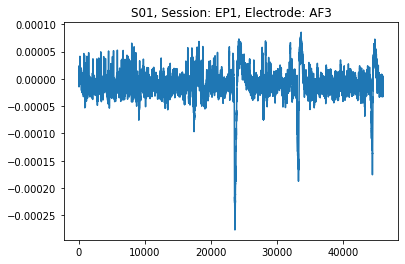

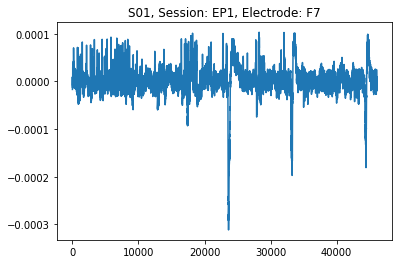

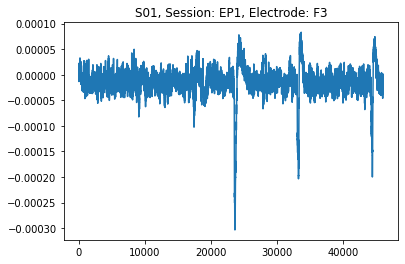

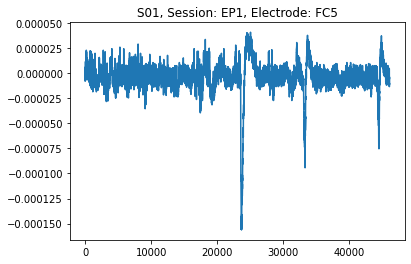

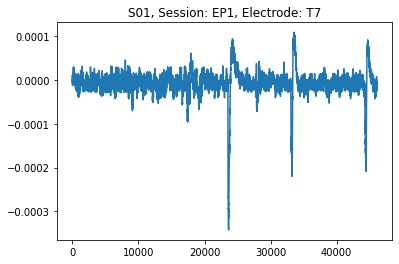

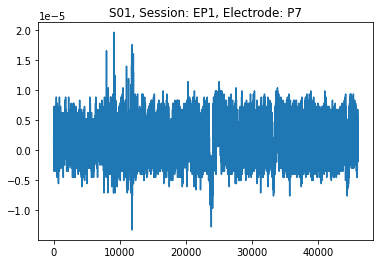

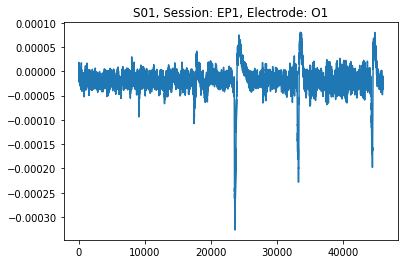

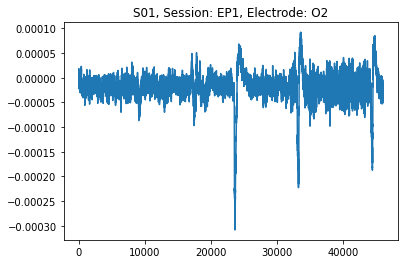

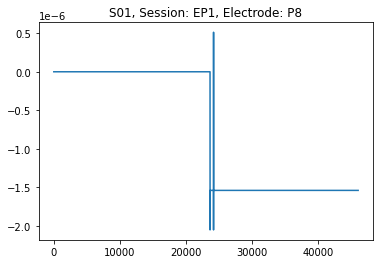

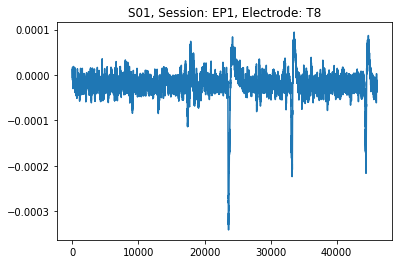

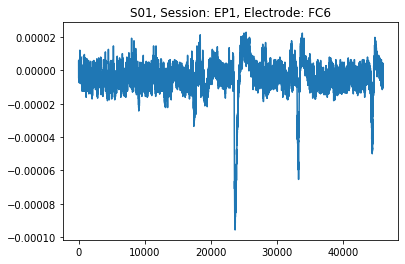

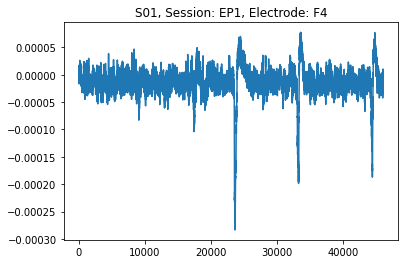

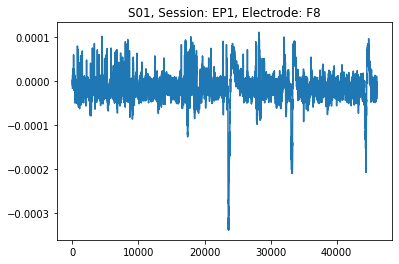

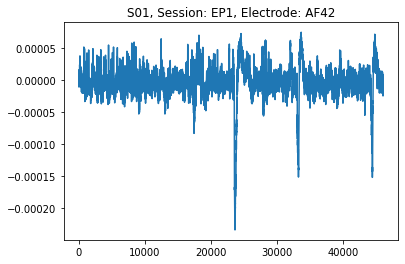

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:53 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


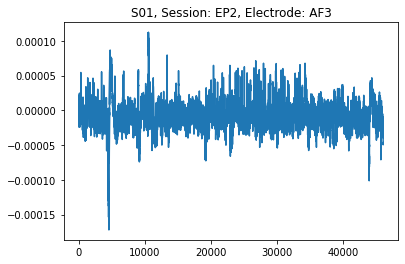

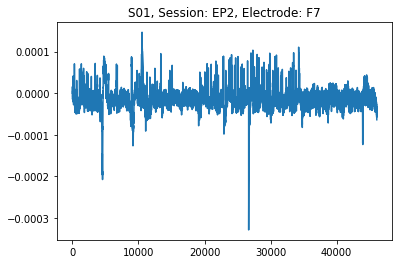

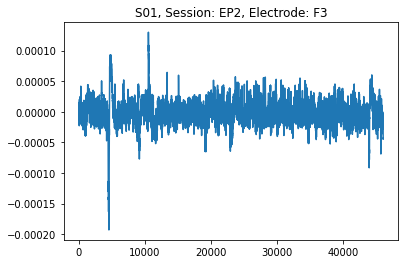

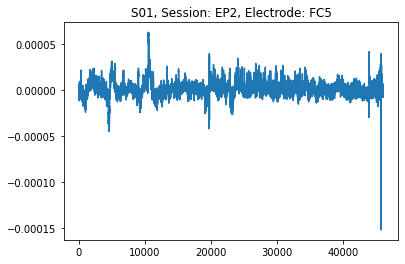

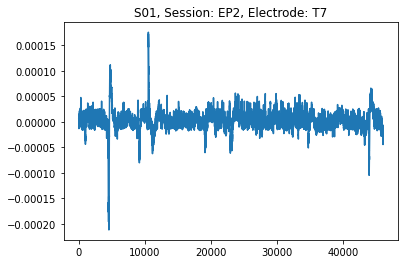

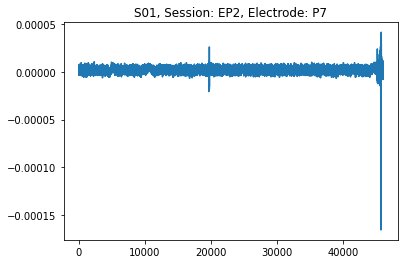

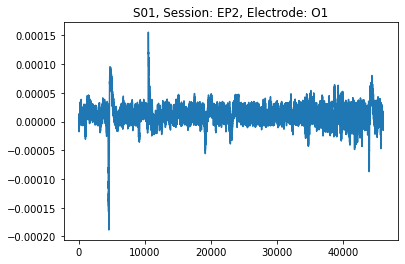

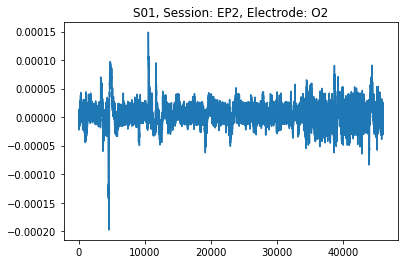

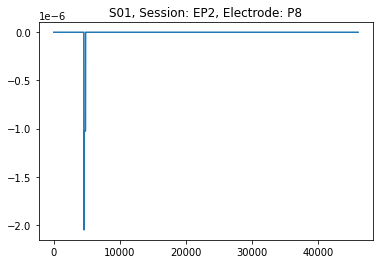

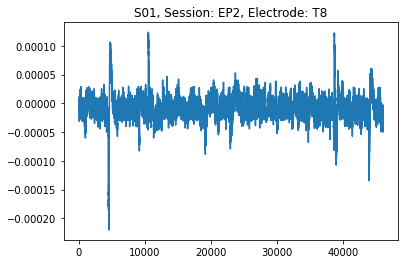

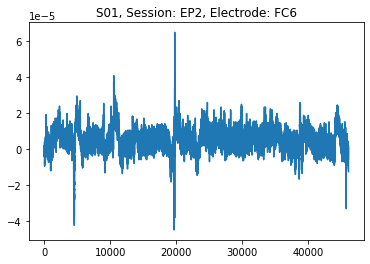

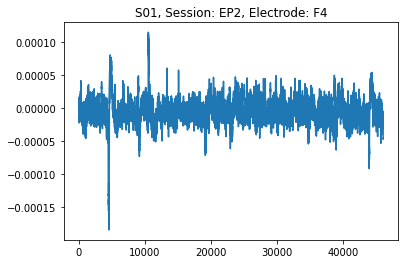

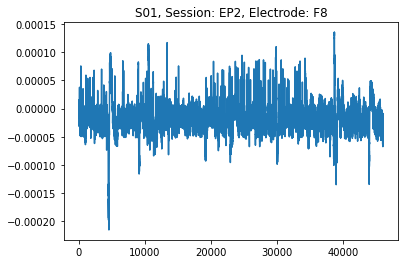

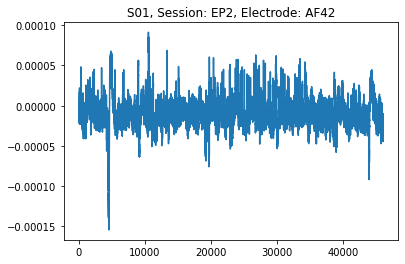

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:44 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


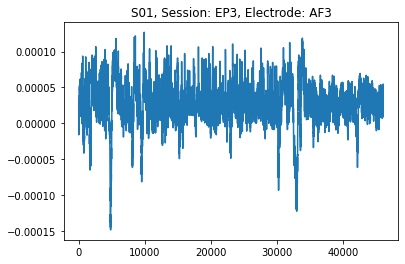

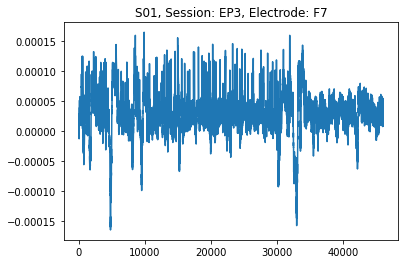

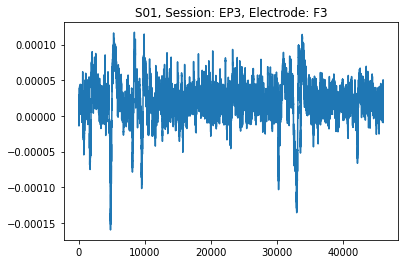

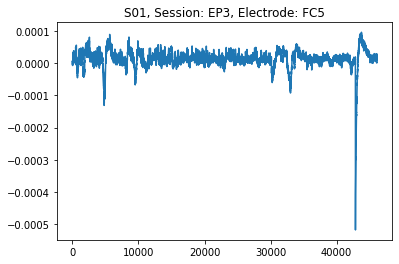

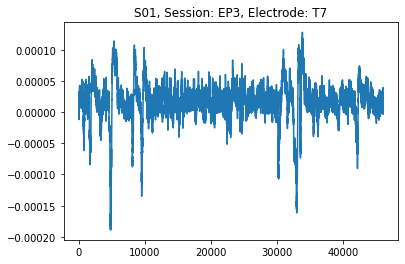

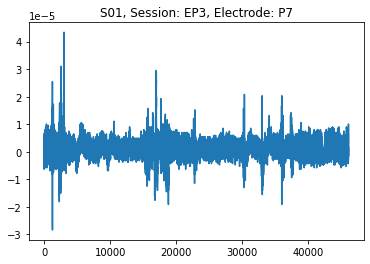

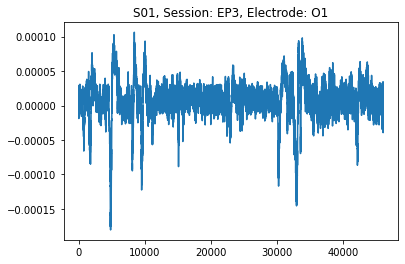

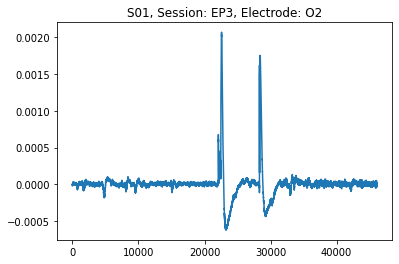

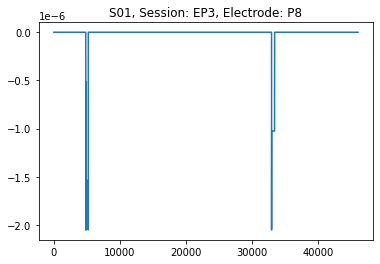

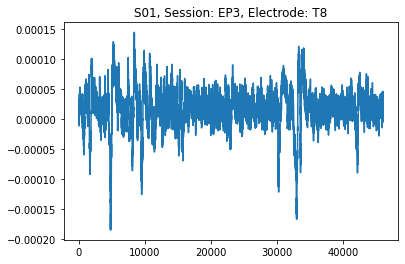

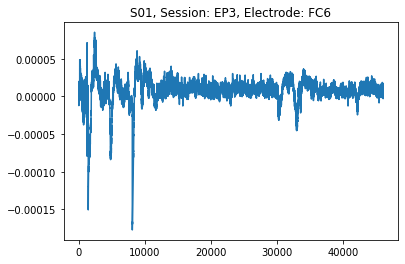

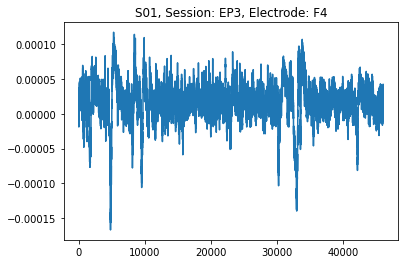

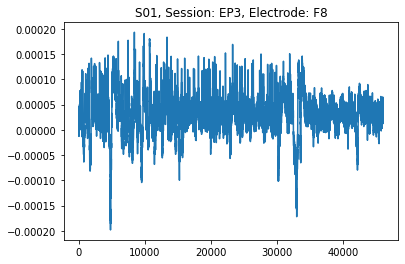

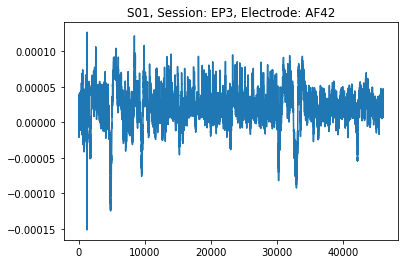

<Info | 7 non-empty values
 bads: []
 ch_names: AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4
 chs: 14 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: 2018-06-13 14:36:50 UTC
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>


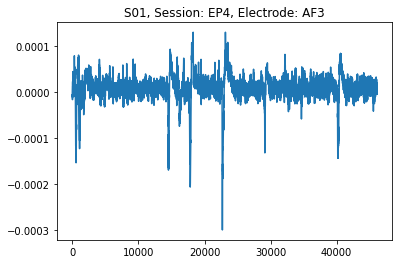

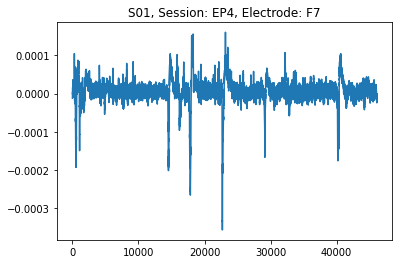

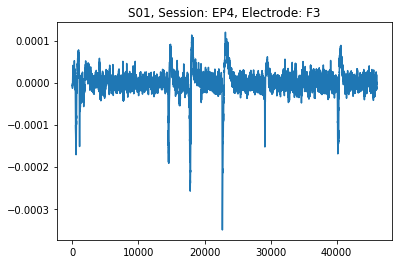

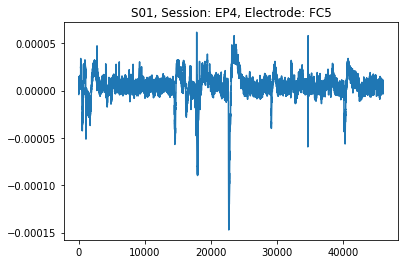

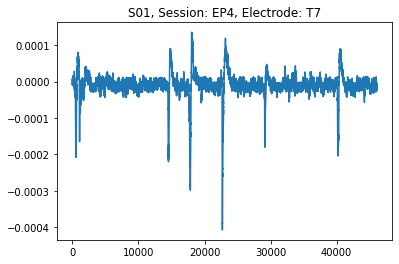

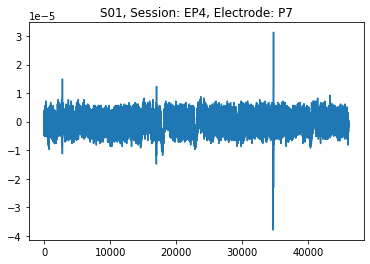

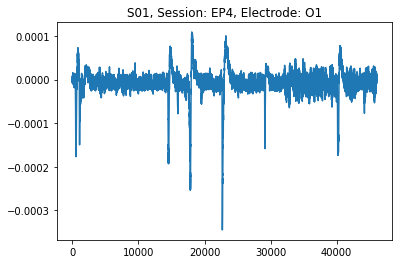

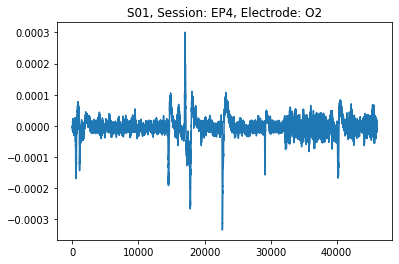

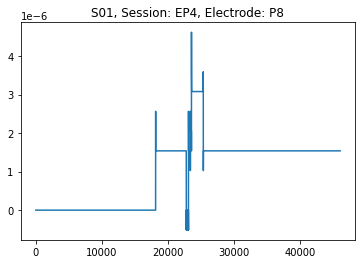

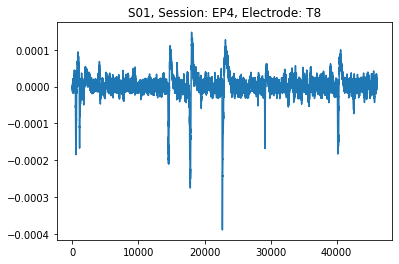

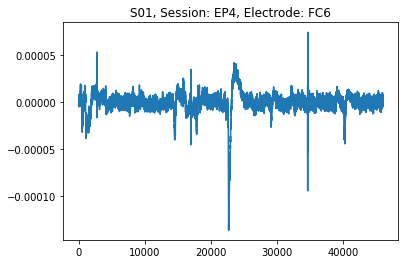

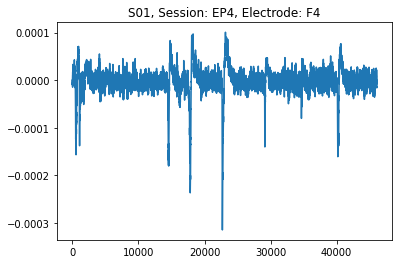

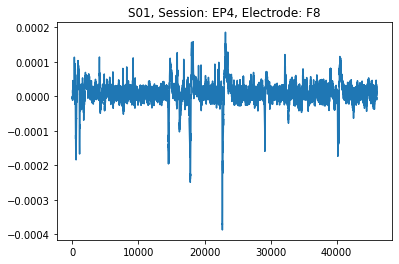

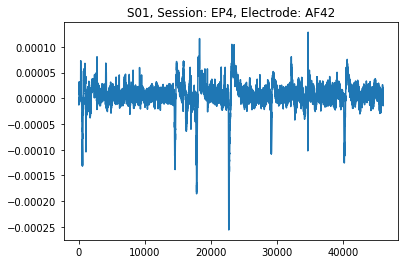

In [40]:
import matplotlib.pyplot as plt
# plt.subplots_adjust(hspace=0.4, wspace=0.4)

chs = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF42']
cols = ['EP1', 'EP2', 'EP3', 'EP4']
s01 = df_raw.iloc[0]
# print(s01['EP1'])
df_selected = df_raw.loc[0:1]
plt_no = 1
for index, row in df_selected.iterrows():
    for col in cols:
        print(row[col].info)
        data = row[col]._data
#         print(data)
        for i in range(len(data)):
#             plt.subplot(7, 4, plt_no)
            plt.plot(data[i,:])
            plt.title("S0" + str(index) + ", Session: " + col + ", Electrode: " + chs[i])
#             plt_no += 1
            plt.show()
#             if(plt_no)
# plt.show()

### Artifacts detection and removal
The environment artifacts and experiment error, which come from external factors, are classified as extrinsic artifacts, whereas the physiological from body itself (e.g., eye blink, muscle activity, heart beat) can be categorized as intrinsic artifacts.
#### Ocular artifacts
-> Eye Movements and Blinks

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


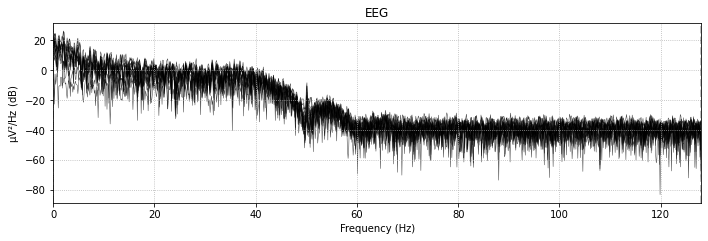

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


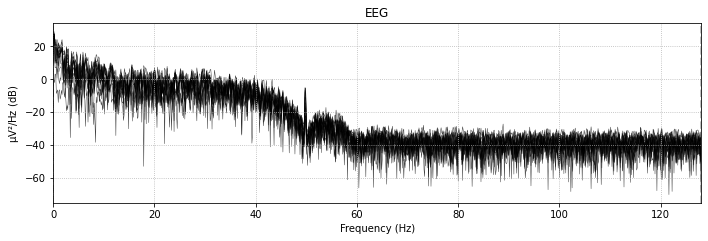

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


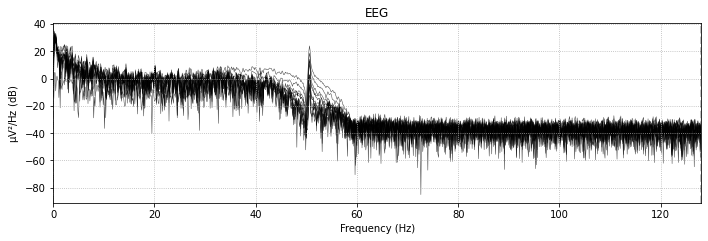

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/825961930.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


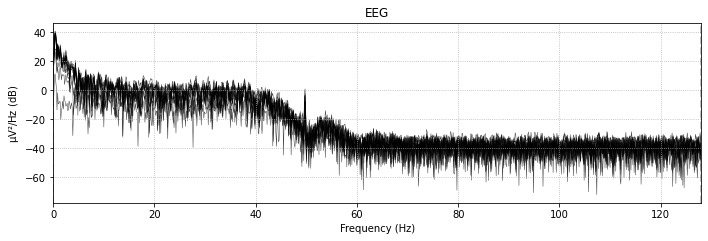

In [26]:
for index, row in df_selected.iterrows():
    for col in cols:
        row[col].info['bads'] = ['P8'] ## Bad Channels
        picks = mne.pick_types(row[col].info, meg='mag', eeg=True, eog=False,
                       stim=False, exclude='bads')
        row[col].plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);
        # Removing power-line noise with notch filtering
        

### Experiment on Subject S01 first session

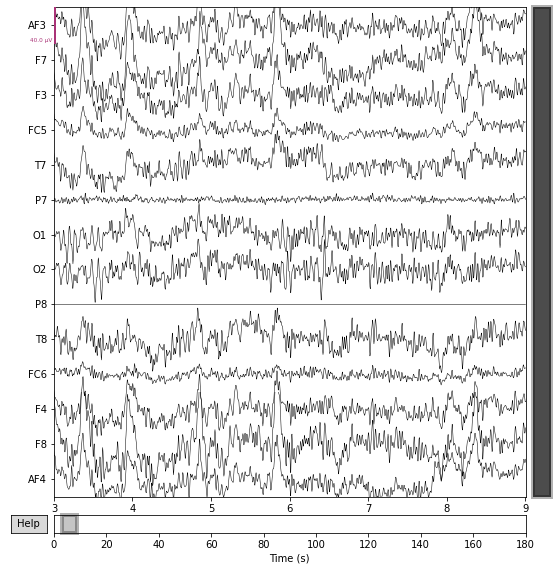

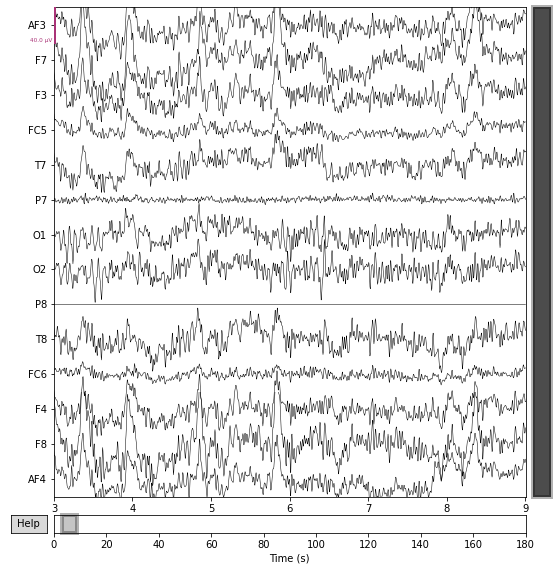

In [41]:
s01 = df_raw.iloc[0]
raw = s01['EP1']
raw.copy().pick_types(eeg=True, stim=True).plot(start=3, duration=6)

#### Sampling, filtering and Removing power-line noise

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/3862731774.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


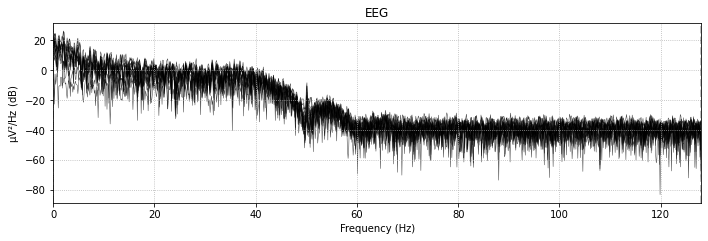

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


/tmp/ipykernel_3679/3862731774.py:8: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);


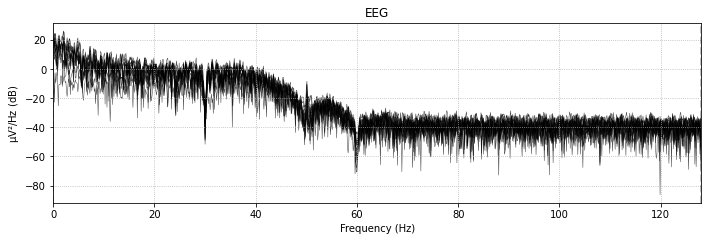

In [42]:
raw.info['bads'] = ['P8'] ## Bad Channels
picks = mne.pick_types(raw.info, meg='mag', eeg=True, eog=False,
               stim=False, exclude='bads')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);
# Removing power-line noise with notch filtering
raw.notch_filter(np.arange(30, 81, 30), picks=picks, filter_length='auto',
                 phase='zero')
raw.plot_psd(area_mode='range', tmax=10.0, picks=picks, average=False);

In [44]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

filt_raw = raw.copy().filter(l_freq=1., h_freq=None)

ica = ICA(n_components=13, max_iter='auto', random_state=97)
ica.fit(filt_raw)
ica

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 845 samples (3.301 sec)

Fitting ICA to data using 13 channels (please be patient, this may take a while)
Selecting by number: 13 components
Fitting ICA took 2.0s.


Method,fastica
Fit,42 iterations on raw data (46080 samples)
ICA components,13
Explained variance,100.0 %
Available PCA components,13
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=13, n_times=46080
    Range : 0 ... 46079 =      0.000 ...   179.996 secs
Ready.


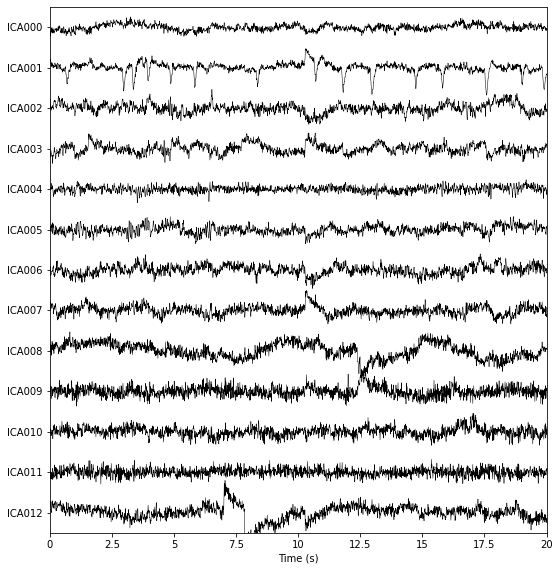

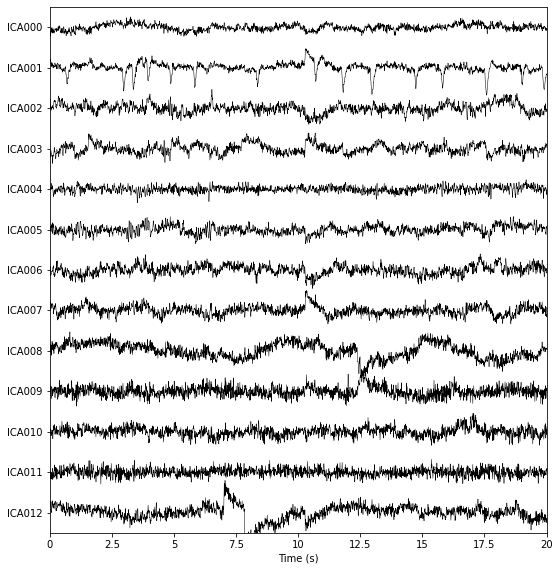

In [45]:
ica.plot_sources(raw, show_scrollbars=False)

Applying ICA to Raw instance
    Transforming to ICA space (13 components)
    Zeroing out 1 ICA component
    Projecting back using 13 PCA components


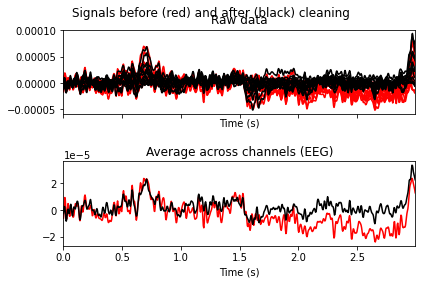

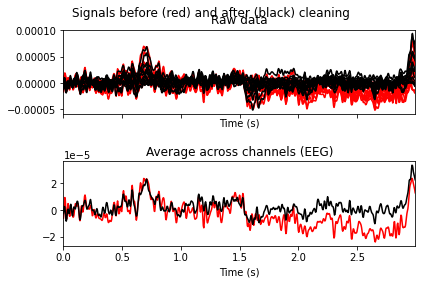

In [46]:
# blinks
ica.plot_overlay(raw, exclude=[0], picks='eeg')

In [139]:
regexp = r'(AF3|FC5|T8)'
# print(row[col].ch_names)
artifact_picks = mne.pick_channels_regexp(row[col].ch_names, regexp=regexp)